### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import csv

import timeit
from tqdm import tqdm

In [2]:
from model import mpd_ndb, model_knn
from model import evaluate_model

### Initialize NDB object to build kNN Model - k Nearest Neighbors

In [3]:
ndb = mpd_ndb.spotify_mpd()

In [4]:
ndb.get_data(True)

Tracks summary: There are 1124914 tracks from 172112 artists
Track Dictionaries summary: There are 1124914 unique tracks in the dictionaries per tid and spid
   pid  tid  rate
0    0    0     1
1    0    2     1
2    0    3     1
3    0    4     1
4    0    5     1
Train summary: There are 171069 playlist, 170068 tracks and 12864850 rates in the train set
   pid  tid  rate
0    0    1     1
1    0    7     1
2    0    8     1
3    0   11     1
4    0   14     1
Test summary: There are 171069 playlist, 167581 tracks and 5513508 rates in the test set
(171069, 170117)
Train Matrix summary: 171069x170117 sparse matrix of dtype int8 with 12864850 stored elements in Compressed Sparse Row format
(171069, 170117)
Test Matrix summary: 171069x170117 sparse matrix of dtype int8 with 5513508 stored elements in Compressed Sparse Row format


### Initialize kNN Model

In [5]:
# Define input variables

name_kNN = 'knn'
n_neighbors = 25
metric = 'cosine'
sp_train = ndb.train_sparse_matrix
# X = random.randint(0, sp_train.shape[0]-1)   # Select Random Playlist ID
topk = 50

In [6]:
# Use same random PID-playlist as Popularity-Model
X = 157638

In [7]:
# k Nearest Neighbors
kNN_model = model_knn.nneighbors_model(name_kNN, n_neighbors, metric, sp_train, True)

### Predict Topk tracks using kNN Model

In [8]:
# Get titles from random Playlist - sp_train

[(x, ndb.get_title(x)) for x in list(sp_train.getrow(X).indices)]

[(197, 'Break Apart - Bonobo'),
 (282, 'Goshen - Beirut'),
 (302, 'Pale Blue Eyes - The Velvet Underground'),
 (2938, 'Lua - Bright Eyes'),
 (3162, 'The Less I Know The Better - Tame Impala'),
 (4239, 'Heartbeats - José González'),
 (4424, '3 Rounds and a Sound - Blind Pilot'),
 (4722, 'Chamber Of Reflection - Mac Demarco'),
 (4938, 'Warm On A Cold Night - HONNE'),
 (5787, 'Cranes in the Sky - Solange'),
 (6170, 'River - Leon Bridges'),
 (6873, 'Between The Bars - Elliott Smith'),
 (6876, 'Timshel - Mumford & Sons'),
 (6885, 'Home - Bruno Major'),
 (6918,
  'Wicked Game - Live at Killkenny Arts Festival, Ireland/2011 - James Vincent McMorrow'),
 (7839,
  'This Night Has Opened My Eyes - 2011 Remastered Version - The Smiths'),
 (8081, 'On The Level - Mac Demarco'),
 (8539, 'Space Song - Beach House'),
 (10066,
  'Please, Please, Please Let Me Get What I Want - 2011 Remastered Version - The Smiths'),
 (11666, 'Song For Zula - Phosphorescent'),
 (12425, 'Eyes - Rogue Wave'),
 (12440, 'If 

In [9]:
recommends_knn = kNN_model.predict(X, topk, n_neighbors)

In [10]:
# Get titles from Recommended tracks using k Nearest Neighbors Model for pid

recommends_knn_rank = [[ndb.get_title(x), x] for x in recommends_knn]

In [11]:
df_knn_recs = pd.DataFrame.from_records(recommends_knn_rank, 
                                         columns=['title', 'tid'],
                                         index=pd.RangeIndex(start=1, stop=len(recommends_knn)+1, name='rank'))

In [12]:
df_knn_recs

,title,tid
rank,,
1,Sleep Apnea - Beach Fossils,20476
2,Ode To Viceroy - Mac Demarco,27701
3,One More Love Song - Mac Demarco,7269
4,No Woman - Whitney,255
5,Baby (Bonus Track) - Ariel Pink,5878
6,Places - Shlohmo,23302
7,Teen Sex - infinite bisous,76382
8,For Emma - Bon Iver,6842
9,First Day Of My Life - Bright Eyes,393


### Train and Evaluate kNN Model

In [13]:
# Define input variables

name_kNN = 'knn'
metric = 'cosine'
sp_train = ndb.train_sparse_matrix

In [14]:
# Calculate Predictions for Base Model at Topk

list_of_nneighbors  = [10, 25, 50]
list_of_topks = [5, 10, 25, 50, 100]

trainPlaylists = ndb.train.groupby('pid')['tid'].apply(list).reset_index().sort_index()
train_ids = trainPlaylists.tid.values

testPlaylists = ndb.test.groupby('pid')['tid'].apply(list).reset_index().sort_index()
test_ids = testPlaylists.tid.values

In [15]:
start = timeit.default_timer()

for n, nneighbors in tqdm(enumerate(list_of_nneighbors)):
    
    kNN_model = model_knn.nneighbors_model(name_kNN, nneighbors, metric, sp_train, True)
    print(f'Predictions for: {str(nneighbors)} neighbors')
    knn_predictions = []
    for x, p in enumerate(trainPlaylists.pid):
        if p==1000:
            break

        knn_predictions.append(kNN_model.predict(p, np.max(list_of_topks), nneighbors))
        
    m_knn= evaluate_model.Metrics(train_ids[:1000], test_ids[:1000], knn_predictions[:1000])
    m_knn_results_recall = m_knn.recall_at_n(list_of_topks, True)
    m_knn_results_map = m_knn.map_at_n(list_of_topks, True)

    with open('./results/model_scores.csv', 'a') as f:
        writer = csv.writer(f)
        for i, topk in enumerate(list_of_topks):
            writer.writerow(
                [kNN_model.model_name, kNN_model.metric, kNN_model.n_neighbors, str(topk) , 
                 str("%.3f" %(m_knn_results_recall[i])), str("%.3f" %(m_knn_results_map[i]))]) 

stop = timeit.default_timer()
print(f'Calculate kNN model results for subset_mpdNDB dataset for {len(train_ids[:1000])} Playlists', stop - start)    

0it [00:00, ?it/s]

Predictions for: 10 neighbors
recall@5=0.174
recall@10=0.145
recall@25=0.109
recall@50=0.123
recall@100=0.183
map@5=0.124
map@10=0.084
map@25=0.049
map@50=0.043


1it [13:03, 783.84s/it]

map@100=0.048
Predictions for: 25 neighbors
recall@5=0.188
recall@10=0.155
recall@25=0.119
recall@50=0.131
recall@100=0.193
map@5=0.131
map@10=0.089
map@25=0.052
map@50=0.046


2it [26:22, 792.75s/it]

map@100=0.051
Predictions for: 50 neighbors
recall@5=0.187
recall@10=0.155
recall@25=0.119
recall@50=0.129
recall@100=0.190
map@5=0.129
map@10=0.087
map@25=0.051
map@50=0.045


3it [39:37, 792.53s/it]

map@100=0.050
Calculate kNN model results for subset_mpdNDB dataset for 1000 Playlists 2377.6060461


### Compare Metrics of Popularity and KNN Model

In [16]:
df = pd.read_csv('./results/model_scores.csv')

In [17]:
df

,model_type,similarity_option,k,topk,recall,map
0,popularity,-,0,5,0.025,0.015
1,popularity,-,0,10,0.023,0.010
2,popularity,-,0,25,0.020,0.005
3,popularity,-,0,50,0.027,0.005
4,popularity,-,0,100,0.027,0.005
5,knn,cosine,10,5,0.174,0.124
6,knn,cosine,10,10,0.145,0.084
7,knn,cosine,10,25,0.109,0.049
8,knn,cosine,10,50,0.123,0.043
9,knn,cosine,10,100,0.183,0.048


In [18]:
models_recall = df.groupby(['model_type', 'similarity_option', 'k'])['recall'].apply(list)

In [19]:
models_recall

model_type  similarity_option  k 
knn         cosine             10    [0.174, 0.145, 0.109, 0.123, 0.183]
                               25    [0.188, 0.155, 0.119, 0.131, 0.193]
                               50     [0.187, 0.155, 0.119, 0.129, 0.19]
popularity  -                  0      [0.025, 0.023, 0.02, 0.027, 0.027]
Name: recall, dtype: object

In [20]:
models_map = df.groupby(['model_type', 'similarity_option', 'k'])['map'].apply(list)

In [21]:
models_map

model_type  similarity_option  k 
knn         cosine             10    [0.124, 0.084, 0.049, 0.043, 0.048]
                               25    [0.131, 0.089, 0.052, 0.046, 0.051]
                               50     [0.129, 0.087, 0.051, 0.045, 0.05]
popularity  -                  0      [0.015, 0.01, 0.005, 0.005, 0.005]
Name: map, dtype: object

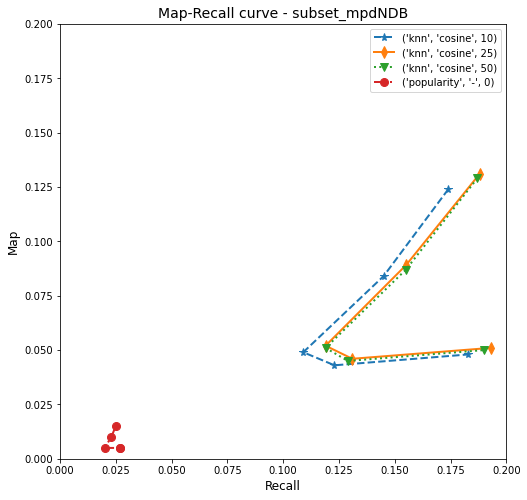

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
from itertools import cycle

fig1 = plt.figure(figsize=(8,8))
plt.xlim([0,0.200])
plt.ylim([0,0.200])

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Map', fontsize=12)
plt.title('Map-Recall curve - subset_mpdNDB', fontsize=14)
marker = itertools.cycle(('*', 'd', 'v', 'o')) 
slines = ["--","-",":","-."]
linecycler = cycle(slines)

lines = []
for i, recall in enumerate(models_recall):
    lines += plt.plot(recall, models_map[i], marker=next(marker), label="{}".format(models_recall.index[i]),
                      linewidth=2, markersize=8, linestyle=next(linecycler))
    
labels = [l.get_label() for l in lines]
plt.legend(lines, labels)   

In [23]:
fig1.savefig('./visualization/Map-Recall curve.png')

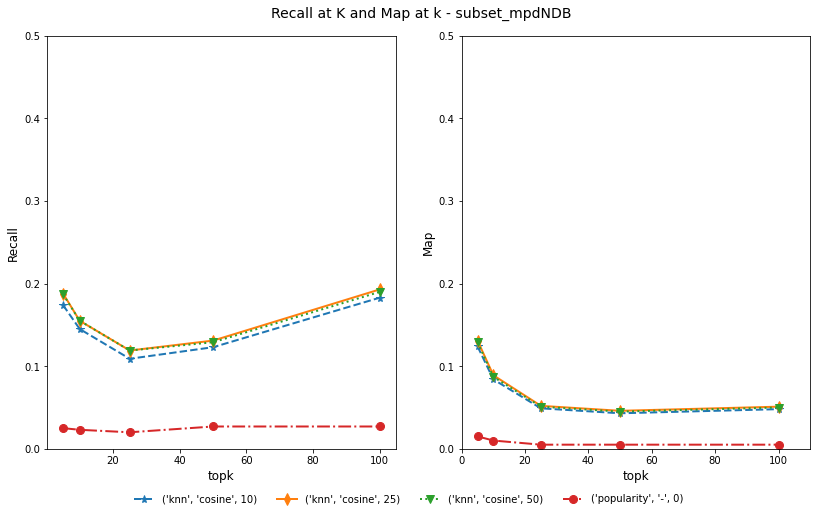

In [24]:

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))
fig2.tight_layout(pad=3.5)
fig2.suptitle('Recall at K and Map at k - subset_mpdNDB', fontsize=14)

plt.xlim([0,110])

ax1.set_ylim([0,.5])
ax1.set_xlabel('topk', fontsize=12)
ax1.set_ylabel('Recall', fontsize=12)

marker = itertools.cycle(('*', 'd', 'v', 'o')) 
slines = ["--","-",":","-."]
linecycler = cycle(slines)

lines1 = []
for i, recall in enumerate(models_recall):
    lines1 += ax1.plot(list_of_topks, recall, marker=next(marker), label="{}".format(models_recall.index[i]),
                      linewidth=2, markersize=8, linestyle=next(linecycler))

ax2.set_ylim([0,.5])
ax2.set_xlabel('topk', fontsize=12)
ax2.set_ylabel('Map', fontsize=12)    
lines2 = []
for i, map in enumerate(models_map):
    lines2 += ax2.plot(list_of_topks, map, marker=next(marker), label="{}".format(models_map.index[i]),
                      linewidth=2, markersize=8, linestyle=next(linecycler))
    
labels = [l.get_label() for l in lines1]
fig2.legend(lines1, labels, loc='lower center', ncol=len(labels),borderaxespad=0, frameon=False) 

In [25]:
fig2.savefig('./visualization/Recall at K and Map at k - MPD_NDB.png')